# Transform

Do imports.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
from ae483tools import *
from math import sin,cos

Load data from a flight in which the drone took off, moved in a square, and landed.

In [7]:
def load_controller_data(filename, dt):
    with open(filename, 'r') as f:
        log_data = json.load(f)
    controller = log_data['controller']
    return {
        'xcurr': np.array(controller['xcurr']),
        'u': np.array(controller['u']),
        'f_cmd': np.array(controller['f_cmd']),
        'att_target': np.array(controller['target_attitude']),
        'timestamp': np.array(controller['timestamp']) * dt,
        'filename': filename  # optionally store filename for reference
    }



data_reference = np.load('quadN_traj1_T5.npz') #np.load('quadN_hover_200hz.npz')
dt=1/100
Xstar = data_reference['X'].T
Ustar = data_reference['U'].T

# Load all data in a list
file_list = [
    "CCM_traj1_cmp_0.1_10_0.8_T5.json",
    # "CCM_traj1_cmp_0.1_5_0.8_T5.json",
    "CCM_traj1_cmp_0.2_10_0.8_T5.json",
    "CCM_traj1_cmp_0.2_5_0.8_T5.json",
    # "CCM_traj1_cmp2_0.2_5_0.8_T5.json"
    # "CCM_traj1_cmp_0.2_5_1_T5.json",
    "CCM_traj1_cmp_0.5_25_0.8_T5.json",
    # "CCM_traj1_cmp_0.5_25_0.8_T5.json", 
    "CCM_traj1_weights_0.5_25_0.8_T5.json"

]  
checkpoint_path =[
    "log_QUADROTORM_R100_0.1_10_0.8",
    # "log_QUADROTORM_R100_0.1_5_0.8",
    "log_QUADROTORM_R100_0.2_10_0.8",
    "log_QUADROTORM_R100_0.2_5_0.8",
    # "log_QUADROTORM_R100_0.2_5_0.8"
    # "log_QUADROTORM_R100_0.2_5_1",
    "log_QUADROTORM_R100_0.5_25_0.8",
    "log_QUADROTORM_R100_0.5_25_0.8"
    
]
w_lbs   = np.array([0.1, 0.2, 0.2,0.5,0.5])
w_ubs   = np.array([10,10, 5,5,25])
gammas_CT  = np.array([0.8,0.8, 0.8,0.8,0.8])


gammas =  np.sqrt((1 - 2 * dt * gammas_CT) * (w_lbs / w_ubs))      #np.array([0.05,]*5)     #np.sqrt((1 - 2 * dt * gammas_CT) * (w_lbs / w_ubs))  
print(gammas)

all_data = [load_controller_data(f, dt) for f in file_list]
for i, data in enumerate(all_data):
    data['w_lb'] = w_lbs[i]
    data['w_ub'] = w_ubs[i]
    data['gamma'] = gammas[i]



for i, data in enumerate(all_data):
    data['checkpoint_path'] = checkpoint_path[i]

timestamp = all_data[0]['timestamp'] 

xcurr_0 = all_data[0]['xcurr'] 
xcurr_1 = all_data[1]['xcurr'] 
xcurr_2 = all_data[2]['xcurr'] 
xcurr_3 = all_data[3]['xcurr'] 
xcurr_4 = all_data[4]['xcurr'] 



[0.09919677 0.14028542 0.19839355 0.31368774 0.14028542]


Plot $x, y$ data.

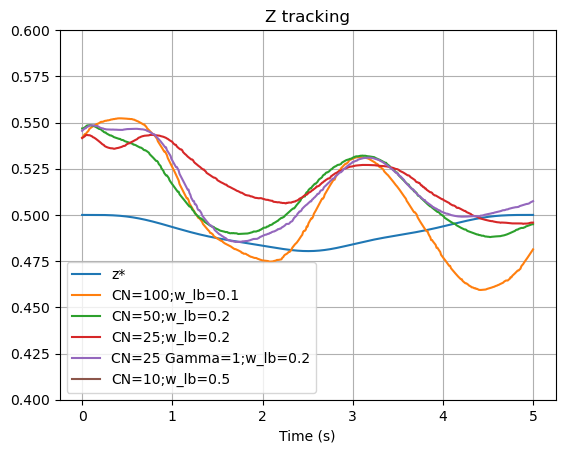

In [8]:
plt.plot(timestamp, Xstar[:, 2], label='z*')

plt.plot(timestamp, xcurr_0[:, 2], label='CN=100;w_lb=0.1')
plt.plot(timestamp, xcurr_1[:, 2], label='CN=50;w_lb=0.2')
plt.plot(timestamp, xcurr_2[:, 2], label='CN=25;w_lb=0.2')
plt.plot(timestamp, xcurr_3[:, 2], label='CN=25 Gamma=1;w_lb=0.2')
plt.plot(timestamp, xcurr_4[:, 2], label='CN=10;w_lb=0.5')
plt.xlabel('Time (s)')
plt.title("Z tracking")
plt.ylim([0.4,0.6])
plt.legend()
plt.grid(True)

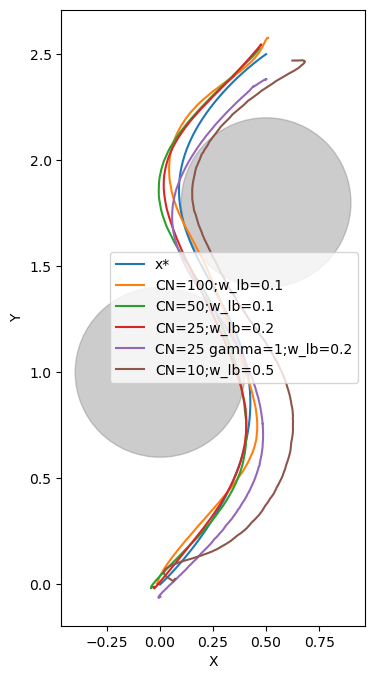

In [9]:
obstacles = [
    {'center': np.array([0, 1, 0.5]), 'radius': 0.4},
    {'center': np.array([0.5, 1.8, 0.5]), 'radius': 0.4}
]

# Create 2D plot
fig, ax = plt.subplots(figsize=(8, 8))
for obs in obstacles:
    center = obs['center'][:2]  # Ignore Z
    radius = obs['radius']
    circle = plt.Circle(center, radius, color='gray', alpha=0.4)
    ax.add_patch(circle)

ax.plot(Xstar[:, 0], Xstar[:, 1], label='x*')
ax.plot(xcurr_0[:, 0], xcurr_0[:, 1], label='CN=100;w_lb=0.1')
ax.plot(xcurr_1[:, 0], xcurr_1[:, 1], label='CN=50;w_lb=0.1')
ax.plot(xcurr_2[:, 0], xcurr_2[:, 1], label='CN=25;w_lb=0.2')
ax.plot(xcurr_3[:, 0], xcurr_3[:, 1], label='CN=25 gamma=1;w_lb=0.2')
ax.plot(xcurr_4[:, 0], xcurr_4[:, 1], label='CN=10;w_lb=0.5')


# ax.scatter(Xstar[0,0], Xstar[0,1], color='green', label='Start')
# ax.scatter(Xstar[-1,0], Xstar[-1,1], color='red', label='Goal')

# Set limits and labels
ax.set_aspect('equal')
# ax.set_xlim(-1, 2)
# ax.set_ylim(0, 3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
# plt.grid(True)

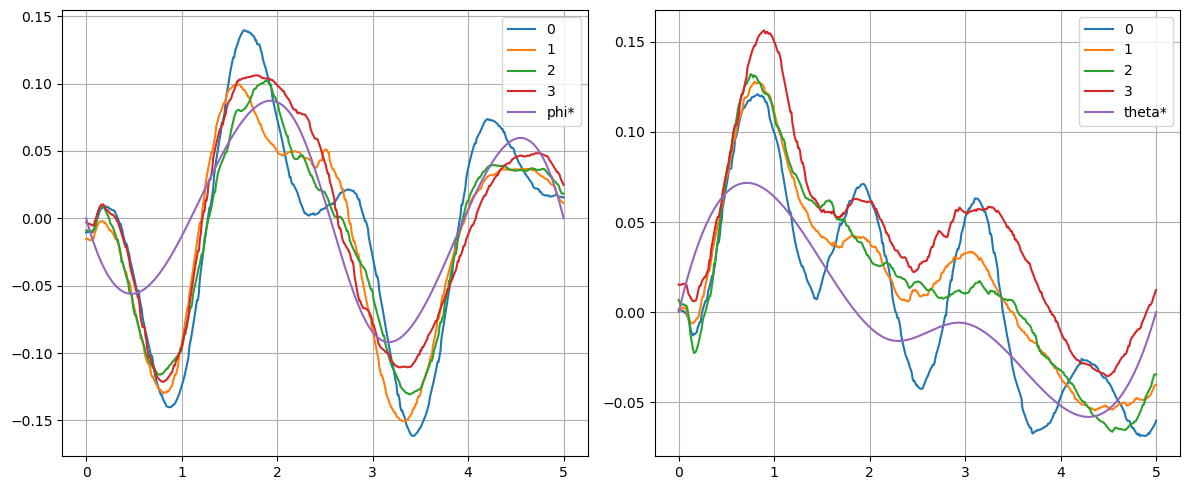

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
axs[0].plot(timestamp,xcurr_0[:,7], label='0')
axs[0].plot(timestamp,xcurr_1[:,7], label='1')
axs[0].plot(timestamp,xcurr_2[:,7], label='2')
axs[0].plot(timestamp,xcurr_3[:,7], label='3')

axs[1].plot(timestamp,xcurr_0[:,8], label='0')
axs[1].plot(timestamp,xcurr_1[:,8], label='1')
axs[1].plot(timestamp,xcurr_2[:,8], label='2')
axs[1].plot(timestamp,xcurr_3[:,8], label='3')

axs[0].plot(timestamp,Xstar[:,7], label='phi*')
axs[1].plot(timestamp,Xstar[:,8], label='theta*')

# plt.plot(t,psi_drone,label='yaw')
axs[0].legend()
axs[1].legend()

# plt.plot(t,m4_drone)
axs[0].grid('True')
axs[1].grid('True')

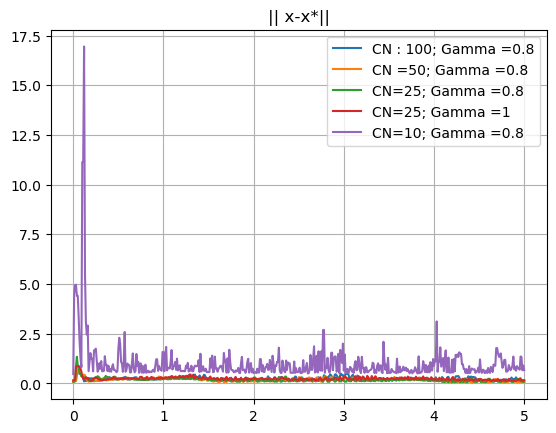

In [11]:
xe_norm_0 = np.linalg.norm(xcurr_0 - Xstar, axis=1)
xe_norm_1 = np.linalg.norm(xcurr_1 - Xstar, axis=1)
xe_norm_2 = np.linalg.norm(xcurr_2 - Xstar, axis=1)
xe_norm_3 = np.linalg.norm(xcurr_3 - Xstar, axis=1)
xe_norm_4 = np.linalg.norm(xcurr_4- Xstar, axis=1)

plt.plot(timestamp, xe_norm_0, label = 'CN : 100; Gamma =0.8')
plt.plot(timestamp, xe_norm_1,label = 'CN =50; Gamma =0.8')
plt.plot(timestamp, xe_norm_2,label = 'CN=25; Gamma =0.8')
plt.plot(timestamp, xe_norm_3,label = 'CN=25; Gamma =1')
plt.plot(timestamp, xe_norm_4,label = 'CN=10; Gamma =0.8')
# plt.ylim([0,1])
plt.title('|| x-x*||')
plt.grid('True')
plt.legend()

for idx, data in enumerate(all_data):
    xcurr = data['xcurr']
    xe__mean_norm = np.mean(np.linalg.norm(xcurr - Xstar, axis=1))

    data['xe_mean_norm'] = xe__mean_norm


In [12]:
def dynamicsFunc_np(x, u, dt, g=9.81):
    vx = x[3]
    vy = x[4]
    vz = x[5]
    f  = x[6]
    phi = x[7]
    theta = x[8]

    x_dot = np.array([
        vx,
        vy,
        vz,
        -f * np.cos(theta) * np.sin(phi),
        f * np.sin(theta),
        -g + f * np.cos(theta) * np.cos(phi),
        u[0],  # dot(f)
        u[1],  # dot(phi)
        u[2]   # dot(theta)
    ])

    return x + dt * x_dot


def D_end(x_traj, u_traj, dt, gamma,w_lb,w_ub):
    T = x_traj.shape[0] - 1
    total = 0.0
    for k in range(T):
        w_k = x_traj[k + 1] - dynamicsFunc_np(x_traj[k], u_traj[k], dt)
        # w_k = x_traj[k+1] - dynamicsFunc_np(x_traj[k], [u_traj[k,0],roll_rate_rad[k],pitch_rate_rad[k]], dt)
        
        norm_w_k = np.linalg.norm(w_k)
        total += (gamma ** (k)) * norm_w_k
    return total 

def D_k_array(x_traj, u_traj, dt, gamma, w_lb, w_ub):
    T = x_traj.shape[0] - 1
    w_norms = np.zeros(T)
    for k in range(T):
        w_k = x_traj[k + 1] - dynamicsFunc_np(x_traj[k], u_traj[k], dt)
        w_norms[k] = np.linalg.norm(w_k)

    D_k = np.zeros(T)
    for k in range(T):
        discounts = gamma ** np.arange(0, k + 1)  # include gamma^k
        D_k[k] = np.sum(discounts * w_norms[:k + 1])

    return D_k


def compute_lyapunov_modelling_error(xcurr,u, Xstar, w_func, w_lb, w_ub, gamma,dt):
    # Ensure matching shapes
    # Xstar = Xstar.T  # Make sure nominal trajectory is (T, 9)
    assert xcurr.shape == Xstar.shape, "xcurr and Xstar must have the same shape"

    T = xcurr.shape[0]
    error = np.zeros(T)

    for i in range(T - 1):
        x = xcurr[i]
        x_next =     dynamicsFunc_np(x, u[i], dt)                    #xcurr[i + 1]
        x_star = Xstar[i]
        x_star_next = Xstar[i + 1]

        M_next = np.linalg.inv(w_func(x_next))
        M_curr = np.linalg.inv(w_func(x))
 

        v_next = x_next - x_star_next
        v_curr = x - x_star

        V_next = np.sqrt(v_next.T @ M_next @ v_next)
        V_curr = np.sqrt(v_curr.T @ M_curr @ v_curr)

        error[i] = np.max([0,np.sqrt(w_ub / w_lb) * V_next - gamma * V_curr])

    return error

def compute_angle_rates(att_target, dt):
    """
    Computes approximate commanded roll and pitch rates from commanded roll/pitch angle commands.

    Returns:
        roll_rate_cmd, pitch_rate_cmd: numpy arrays of shape (N-1,) in radians/sec
    """
    # Finite difference (forward difference)
    roll_deg = att_target[:, 0]
    pitch_deg = att_target[:, 1]

    # Compute rate in deg/s
    roll_rate_deg = np.diff(roll_deg) / dt
    pitch_rate_deg = np.diff(pitch_deg) / dt

    # Convert to radians/sec
    roll_rate_rad = np.deg2rad(roll_rate_deg)
    pitch_rate_rad = np.deg2rad(pitch_rate_deg)

    return roll_rate_rad, pitch_rate_rad


Estimated mean: [-9.07330885e-05  4.23629655e-04  5.01207835e-05 -7.04951479e-04
 -1.09380354e-03  2.11821983e-04 -4.39152957e-03  2.68021276e-04
  3.38789411e-03]
Estimated covariance:
 [[ 2.01089386e-06  2.95720225e-07 -2.82731335e-07 -2.34782273e-07
   1.66937471e-07  1.17367115e-07 -6.18870916e-06 -8.27293528e-07
   1.24096431e-06]
 [ 2.95720225e-07  6.57078526e-06 -5.36123165e-08  2.06517075e-07
   3.48988480e-07  1.06678769e-07 -5.35853447e-07 -1.00772721e-06
   3.11908278e-06]
 [-2.82731335e-07 -5.36123165e-08  6.43286045e-08  6.00454946e-08
  -5.87277785e-08  1.67588465e-08  3.63366348e-06  8.59775930e-07
   1.02476188e-07]
 [-2.34782273e-07  2.06517075e-07  6.00454946e-08  2.12609805e-05
   4.64111926e-06 -1.46544823e-06  5.37335302e-05  3.05744904e-05
   4.62577276e-06]
 [ 1.66937471e-07  3.48988480e-07 -5.87277785e-08  4.64111926e-06
   1.19497371e-05 -1.25681477e-06 -4.92320632e-05  1.71706116e-05
  -8.63274553e-06]
 [ 1.17367115e-07  1.06678769e-07  1.67588465e-08 -1.46544

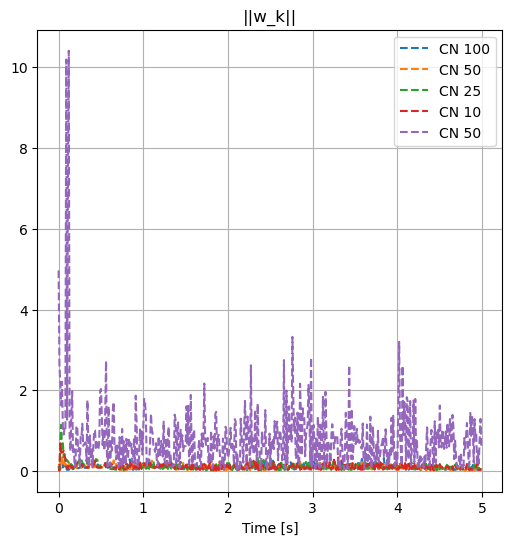

In [16]:
def mle_gaussian(samples):
    # Number of samples
    N = samples.shape[0]
    
    # Empirical mean (1D array of shape (d,))
    mu_hat = np.mean(samples, axis=0)

    # Centered samples
    centered = samples - mu_hat

    # Empirical covariance (divide by N, not N-1 for MLE)
    Sigma_hat = (centered.T @ centered) / N

    return mu_hat, Sigma_hat


fig, ax = plt.subplots(figsize=(6, 6))

for idx, data in enumerate(all_data):
    xcurr = data['xcurr']
    u = data['u']
    w_lb=data['w_lb']
    w_ub=data['w_ub']
    cn = int(w_ub/w_lb)
    timestamp = data['timestamp']
    att_target = data['att_target']
    T = xcurr.shape[0] - 1  # x[k+1] must be valid

    w = np.zeros((T, xcurr.shape[1]))
    w_norms = np.zeros(T)
    roll_rate_rad,pitch_rate_rad = compute_angle_rates(att_target, dt)

    for k in range(T):
        w[k] = xcurr[k+1] - dynamicsFunc_np(xcurr[k], u[k], dt)
        # w[k] = xcurr[k+1,:] - dynamicsFunc_np(xcurr[k,:], [u[k,0],roll_rate_rad[k],pitch_rate_rad[k]], dt)

        w_norms[k] = np.linalg.norm(w[k])

    mu_hat, Sigma_hat = mle_gaussian(w)
    print("Estimated mean:", mu_hat)
    print("Estimated covariance:\n", Sigma_hat)
    #Element wise noise plotting
    # ax.plot(timestamp[:-1], w[:,], '--',label="7")

    ax.plot(timestamp[:-1], w_norms, '--',label=f"CN {cn}")

    # # Compute mean and covariance of the noise
    # w_mean = np.mean(w, axis=0)
    # w_cov = np.cov(w.T)  # shape (9, 9) if xcurr.shape[1] == 9

    # print(f"\n==== Trajectory {idx} ({data['filename']}) ====")
    # print(f"w mean:\n{w_mean}")
    # print(f"w covariance:\n{w_cov}")
    

ax.set_xlabel("Time [s]")
ax.set_title("||w_k||")
ax.legend()
ax.grid(True)


In [14]:
print("Discounted approx CP error term ")
for idx, data in enumerate(all_data):
    xcurr = data['xcurr']
    u = data['u']
    w_lb=data['w_lb']
    w_ub=data['w_ub']
    gamma = data['gamma']
    # att_target = data['att_target']
    # roll_rate_rad,pitch_rate_rad = compute_angle_rates(att_target, dt)
    # D = D_end(xcurr, u, dt, gamma,w_lb,w_ub, roll_rate_rad, pitch_rate_rad)
    D = D_end(xcurr, u, dt, gamma,w_lb,w_ub)
    print("Id :",idx, "D :", D)

    data['D'] = D 


Discounted approx CP error term 
Id : 0 D : 0.1269401336728991
Id : 1 D : 0.1758005590987461
Id : 2 D : 0.12736572667446522
Id : 3 D : 0.12946305291472412
Id : 4 D : 5.383849936771041


In [15]:
from np2pth import get_system_wrapper, get_controller_wrapper, get_w_func_wrapper_from_checkpoint
import importlib

for idx, data in enumerate(all_data):
    xcurr = data['xcurr']
    u = data['u']
    w_lb=data['w_lb']
    w_ub=data['w_ub']
    gamma = data['gamma']
    checkpoint_path=data['checkpoint_path']

    controller = get_controller_wrapper(checkpoint_path + "/controller_best.pth.tar")
    w_func = get_w_func_wrapper_from_checkpoint(checkpoint_path=checkpoint_path +"/model_best.pth.tar", w_lb=w_lb, task = "QUADROTOR_9D")
    error = compute_lyapunov_modelling_error(xcurr,u, Xstar, w_func, w_lb, w_ub, gamma,dt)
    deltaV = np.max(error)
    print("idx :",idx,"deltaV :",deltaV)

    data['deltaV'] = deltaV

idx : 0 deltaV : 3.8932463208835344
idx : 1 deltaV : 2.158457011830873


FileNotFoundError: [Errno 2] No such file or directory: 'log_QUADROTORM_R100_0.2_5_0.8/controller_best.pth.tar'

In [ ]:
#compute fac
for idx, data in enumerate(all_data):
    w_lb=data['w_lb']
    w_ub=data['w_ub']
    gamma = data['gamma']
    D = data['D']
    deltaV = 0   #data['deltaV']
    xe_norm = data['xe_mean_norm']
    fac= np.sqrt(1/w_lb)* D + deltaV*((1-gamma**i)/(1-gamma))
    print("w_lb :",w_lb,"| w_ub :",w_ub,"| CN :", int(w_ub/w_lb),"| gamma DT :",gamma,"DeltaV=",deltaV,"D value=", D,"| xe_norm :",xe_norm, "| fac :",fac)
    data['fac'] = fac

w_lb : 0.1 | w_ub : 10 | CN : 100 | gamma DT : 0.09919677414109795 DeltaV= 0 D value= 0.1269401336728991 | xe_norm : 0.23138863419553438 | fac : 0.4014199488925967
w_lb : 0.2 | w_ub : 10 | CN : 50 | gamma DT : 0.14028542333400146 DeltaV= 0 D value= 0.1758005590987461 | xe_norm : 0.183170424555594 | fac : 0.3931020006272654
w_lb : 0.2 | w_ub : 5 | CN : 25 | gamma DT : 0.1983935482821959 DeltaV= 0 D value= 0.12736572667446522 | xe_norm : 0.17996615824911927 | fac : 0.28479842284776247
w_lb : 0.5 | w_ub : 5 | CN : 10 | gamma DT : 0.31368774282716244 DeltaV= 0 D value= 0.12946305291472412 | xe_norm : 0.23742411808693142 | fac : 0.18308840525822853
w_lb : 0.5 | w_ub : 25 | CN : 50 | gamma DT : 0.14028542333400146 DeltaV= 0 D value= 0.1314764713048197 | xe_norm : 0.19416988771265398 | fac : 0.1859358088522331
